<a href="https://colab.research.google.com/github/deepaksaipendyala/Oil-Tank-Volume-using-Oil-Tanks-Based-on-High-Resolution-Satelite-Images/blob/main/DIP_eval_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

!wget https://www.kaggleusercontent.com/kf/15201520/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..s3r85Addmw6tJXtHbOpTyw.oybF4HeEyQ0fU1MqrXtwWYCgwzcX_d4LQtpzrQ_uuiTjPjPOf3VvgF5RfCtaLf_xDut5wRenUV62aMD9FiraTomK7f10nznZOyaTeb33WjZ_mzosJor1LSBcA64r_pwhYcx7KW3P2_6WWimpyY0Expqsgt5ai0ydVz2zArrXkJP7WllbiuTofhQ7CXKyju4Bm_sgW5HMuylvNpXUcsvK52xf8tQO-78kBXQY5bV8_wyEoZGY3L3QHf70peV6vBHMbNcn-9pJmroz1CMuH9-E3BVM2Uwn_mNA90MSAJsyoy7Iy75otmNbv9QCEdVaTznhBh-AEkbwXsGcBI7xN16oLof9epDxxqh4m8ODwm0ZqTx6TInjZTBlXzHiNv8nIfXdzkEzAGbFi1zJd-rpPxYGeCMvZ2Hkr3g8accQBpxVK6SE8rxKsl2rhZExsJOzOhfu6YK67gch5HD5_MHp0s2IOB6Ao77EaTmYN2ZfQaQ4K_N_iMPlt72TuDUNKQXcrZK0XgNnF06HKpeAIAvd-Nl3xnqTACv6vdXRNWn4_lqFAFVO89KdcOU-2HfRVpHBj4YNKWRoxpj6S5xHdyI9_Vt9U3s65DY4YdXGW6WZI18O4ulba_QohIiBlei2RvUymwlj_qC9NbQuSOyplcvtYX42V3g-knXL2rkEGXerbK1z4O0.oDDr6AN9gTO9suQrZgTBnA/__results___files/__results___21_0.png \
      -O tank.png


--2022-12-26 21:10:40--  https://www.kaggleusercontent.com/kf/15201520/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..s3r85Addmw6tJXtHbOpTyw.oybF4HeEyQ0fU1MqrXtwWYCgwzcX_d4LQtpzrQ_uuiTjPjPOf3VvgF5RfCtaLf_xDut5wRenUV62aMD9FiraTomK7f10nznZOyaTeb33WjZ_mzosJor1LSBcA64r_pwhYcx7KW3P2_6WWimpyY0Expqsgt5ai0ydVz2zArrXkJP7WllbiuTofhQ7CXKyju4Bm_sgW5HMuylvNpXUcsvK52xf8tQO-78kBXQY5bV8_wyEoZGY3L3QHf70peV6vBHMbNcn-9pJmroz1CMuH9-E3BVM2Uwn_mNA90MSAJsyoy7Iy75otmNbv9QCEdVaTznhBh-AEkbwXsGcBI7xN16oLof9epDxxqh4m8ODwm0ZqTx6TInjZTBlXzHiNv8nIfXdzkEzAGbFi1zJd-rpPxYGeCMvZ2Hkr3g8accQBpxVK6SE8rxKsl2rhZExsJOzOhfu6YK67gch5HD5_MHp0s2IOB6Ao77EaTmYN2ZfQaQ4K_N_iMPlt72TuDUNKQXcrZK0XgNnF06HKpeAIAvd-Nl3xnqTACv6vdXRNWn4_lqFAFVO89KdcOU-2HfRVpHBj4YNKWRoxpj6S5xHdyI9_Vt9U3s65DY4YdXGW6WZI18O4ulba_QohIiBlei2RvUymwlj_qC9NbQuSOyplcvtYX42V3g-knXL2rkEGXerbK1z4O0.oDDr6AN9gTO9suQrZgTBnA/__results___files/__results___21_0.png
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kaggleuserco

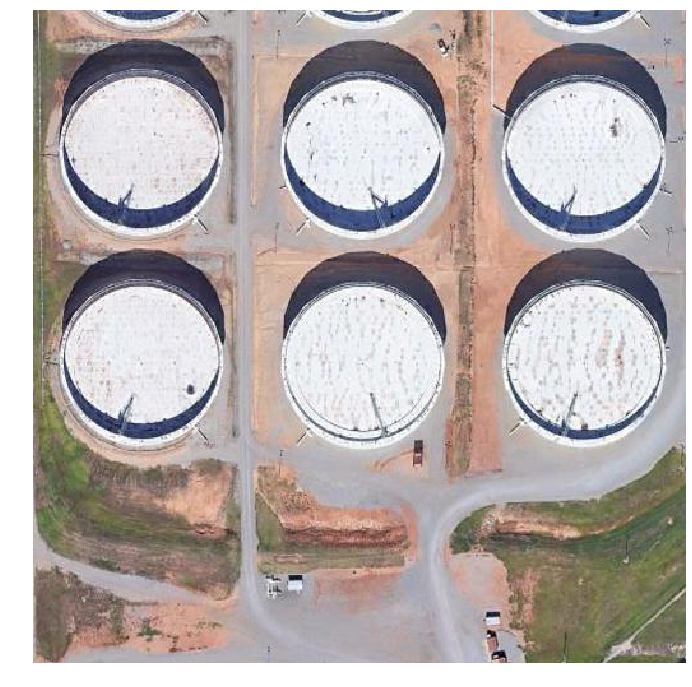

In [30]:
imag = 'tank.png'
img = cv2.imread(imag)
s=img.shape
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [17]:
# Frequency domain
f = imgg
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

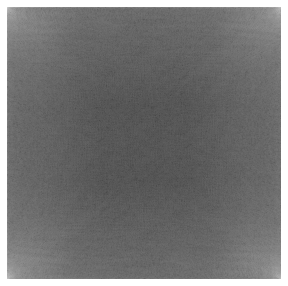

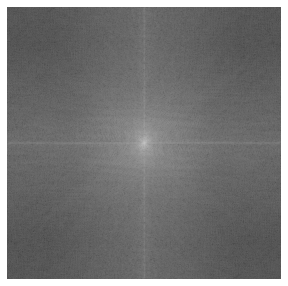

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

In [19]:
#Gaussian low pass filter function
def GLPF(img, D0):
  M,N = img.shape
  H = np.zeros((M,N), dtype=np.float32)

  
  for u in range(M):
    for v in range(N):
      D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
      H[u,v] = np.exp(-D**2/(2*D0*D0))

  return H


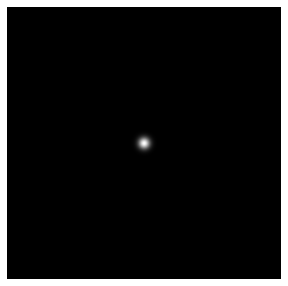

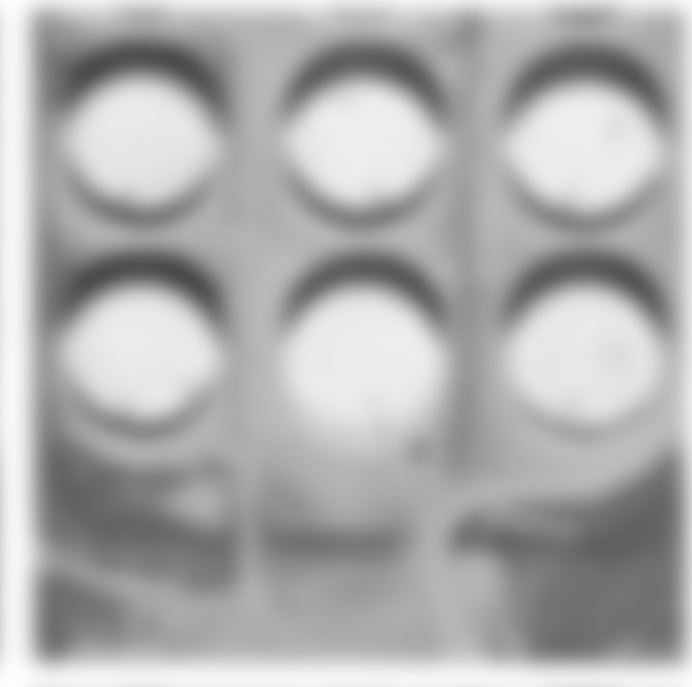

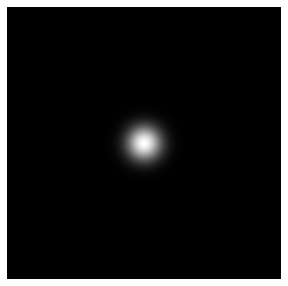

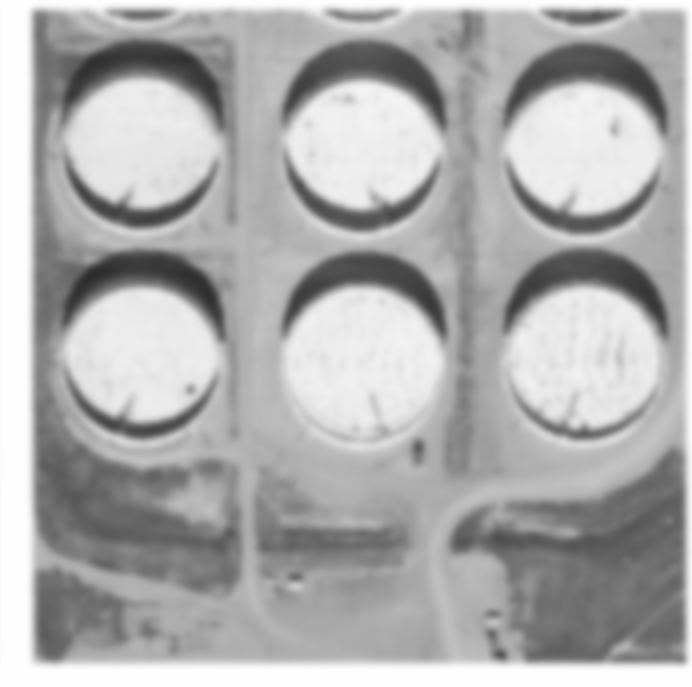

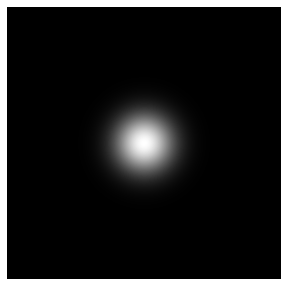

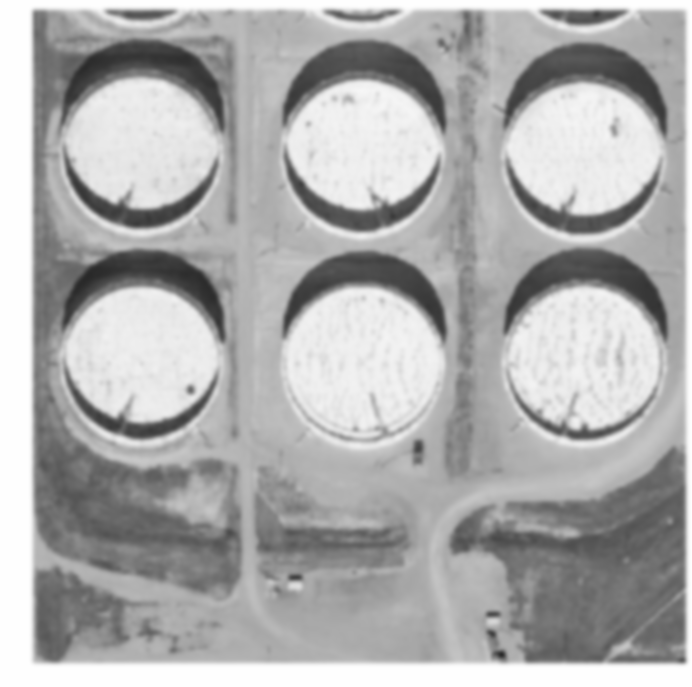

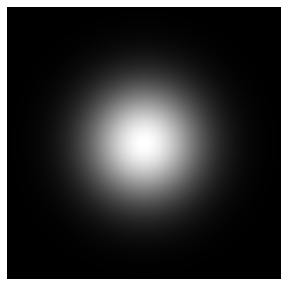

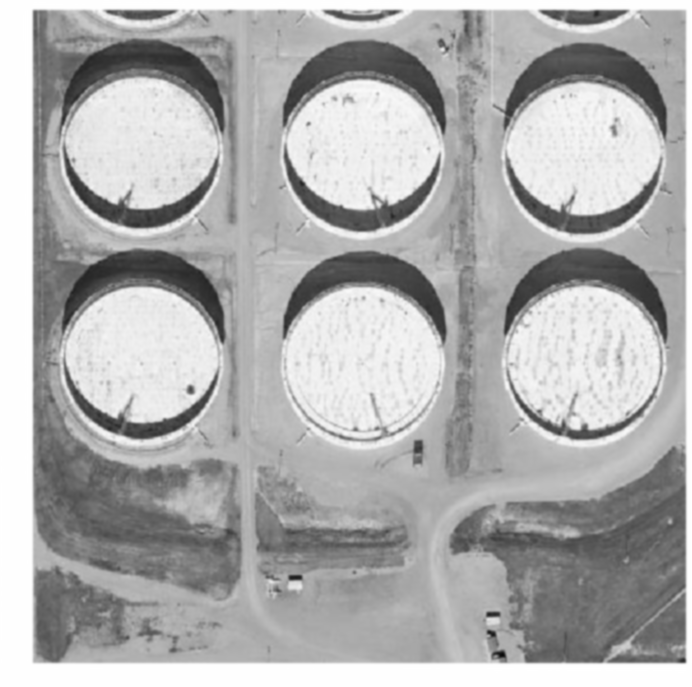

In [20]:
for d0 in [10, 30, 50, 100]:
  H = GLPF(imgg, d0)
  plt.figure(figsize=(5,5))
  plt.imshow(H, cmap='gray')
  plt.axis('off')
  plt.show()
  Gshift = Fshift * H
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))



  # plt.figure(figsize=(5,5))
  # plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
  # plt.axis('off')
  # plt.show()

  # plt.figure(figsize=(5,5))
  # plt.imshow(np.log1p(np.abs(G)), cmap='gray')
  # plt.axis('off')
  # plt.show()

  cv2_imshow(g)

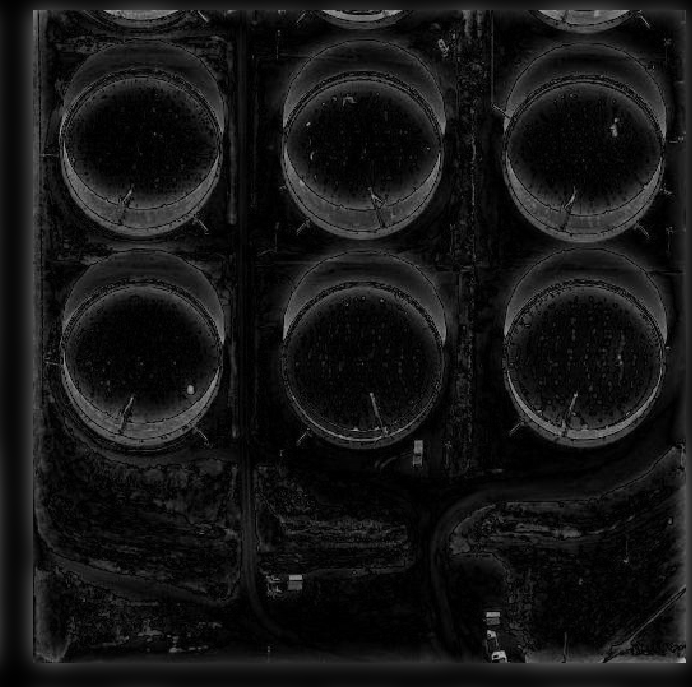

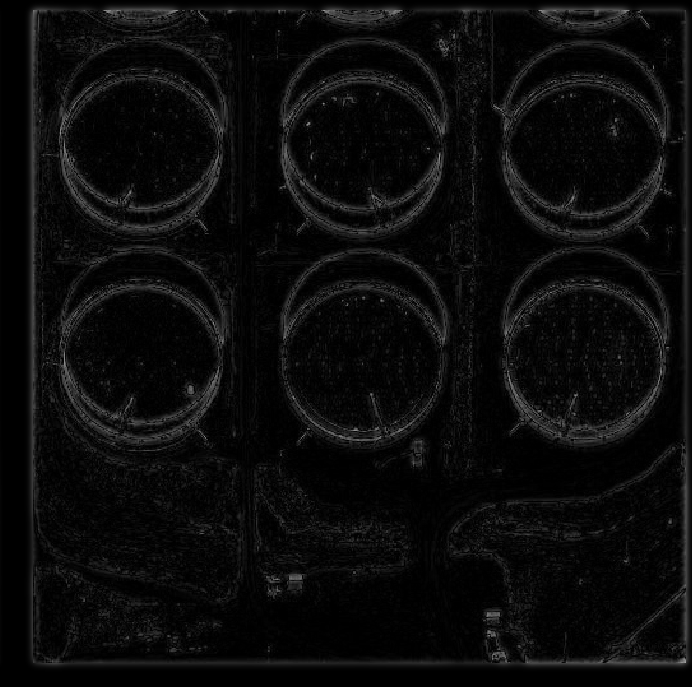

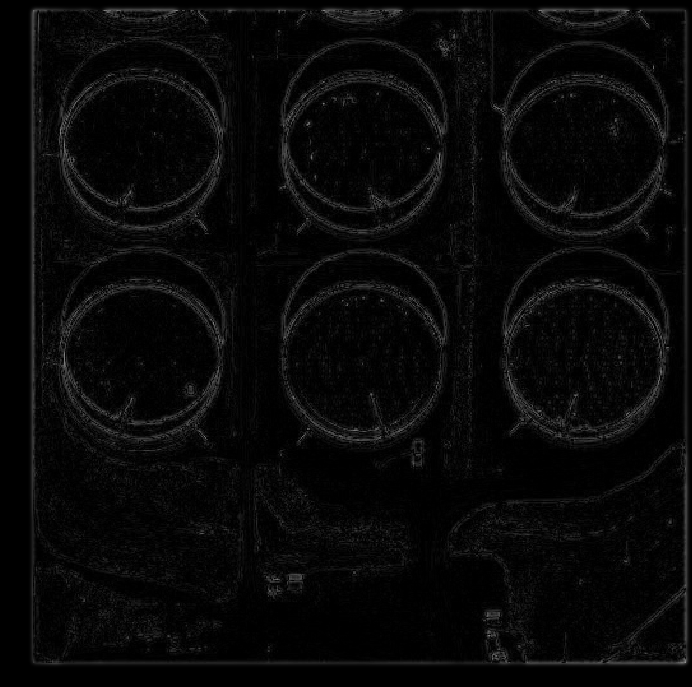

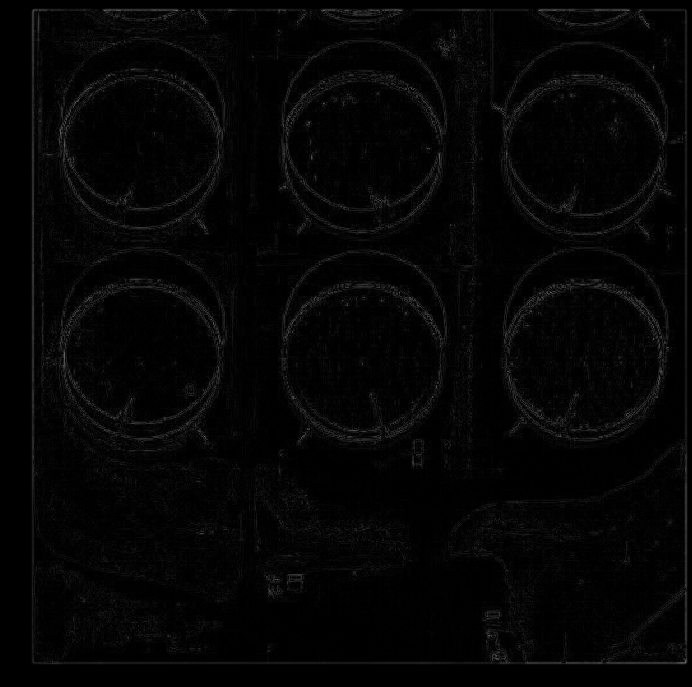

In [21]:
#Gaussian high pass filter
for d0 in [10, 30, 50, 100]:
  H = GLPF(imgg, d0)
  # plt.figure(figsize=(5,5))
  # plt.imshow(H, cmap='gray')
  # plt.axis('off')
  # plt.show()
  Hp = 1 - H
  Gshift = Fshift * Hp
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

  # plt.figure(figsize=(5,5))
# plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
# plt.axis('off')
# plt.show()

# plt.figure(figsize=(5,5))
# plt.imshow(np.log1p(np.abs(G)), cmap='gray')
# plt.axis('off')
# plt.show()


# cv2_imshow(negative_img)

In [22]:
# BLPF
def BLPF(img, D0, n =1):
  M,N = img.shape
  H = np.zeros((M,N), dtype=np.float32)
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
          H[u,v] = 1 / (1 + (D/D0)**(2*n))
  return H

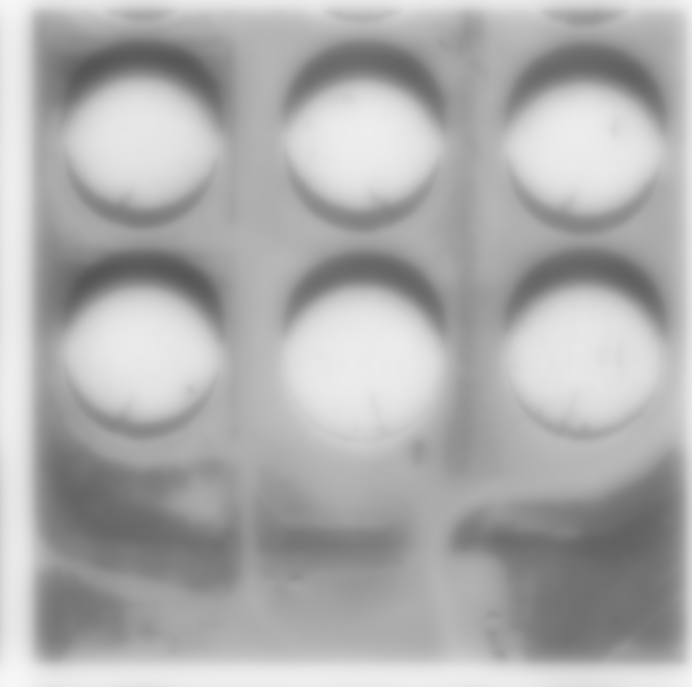

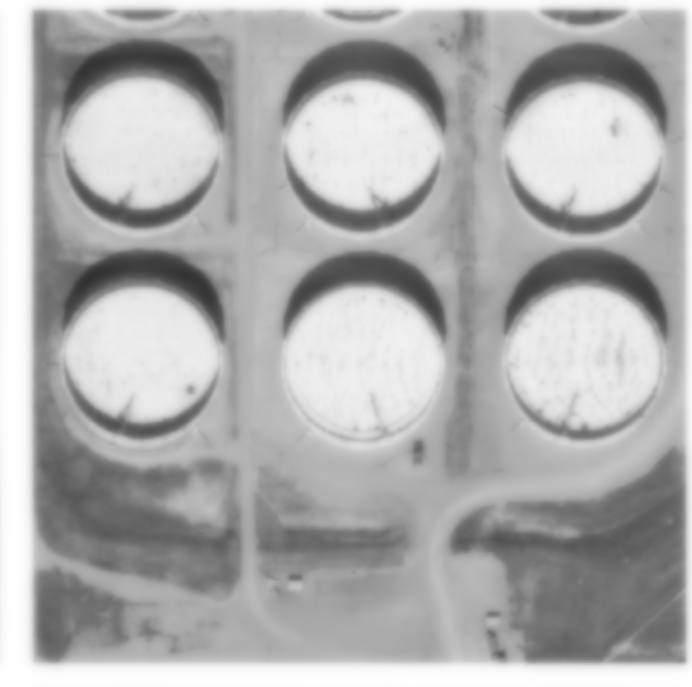

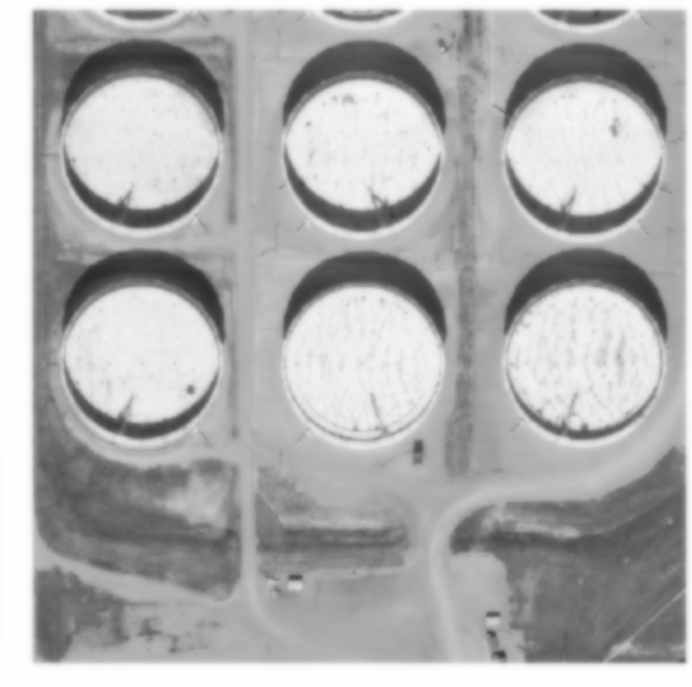

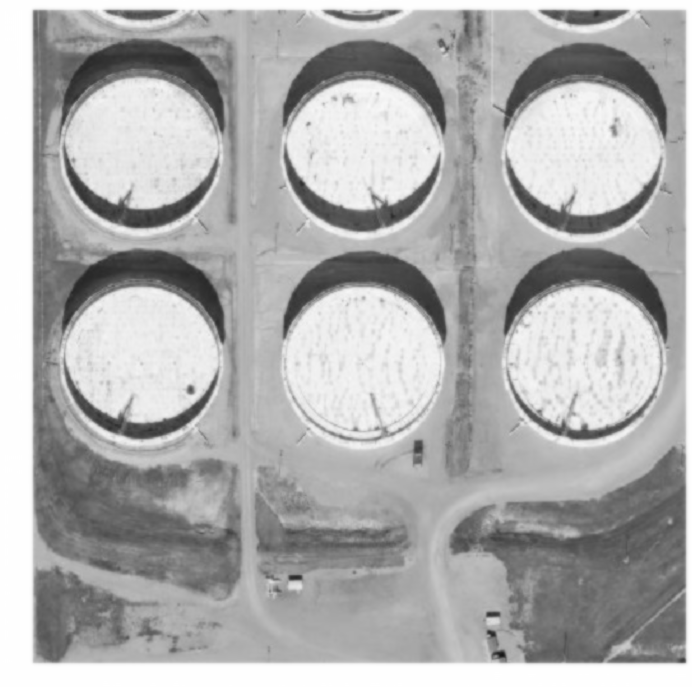

In [23]:
for d0 in [10, 30, 50, 100]:
  H = BLPF(imgg, d0)
  # plt.figure(figsize=(5,5))
  # plt.imshow(H, cmap='gray')
  # plt.axis('off')
  # plt.show()
  
  Gshift = Fshift * H
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

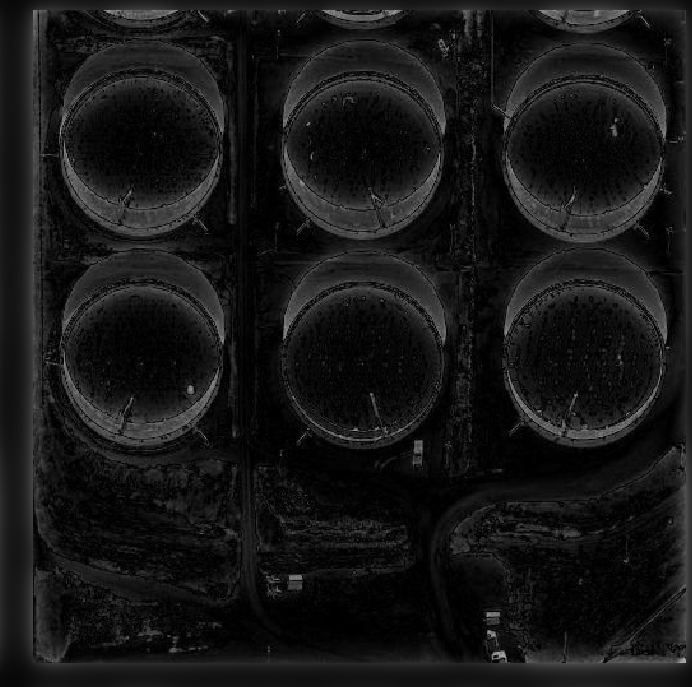

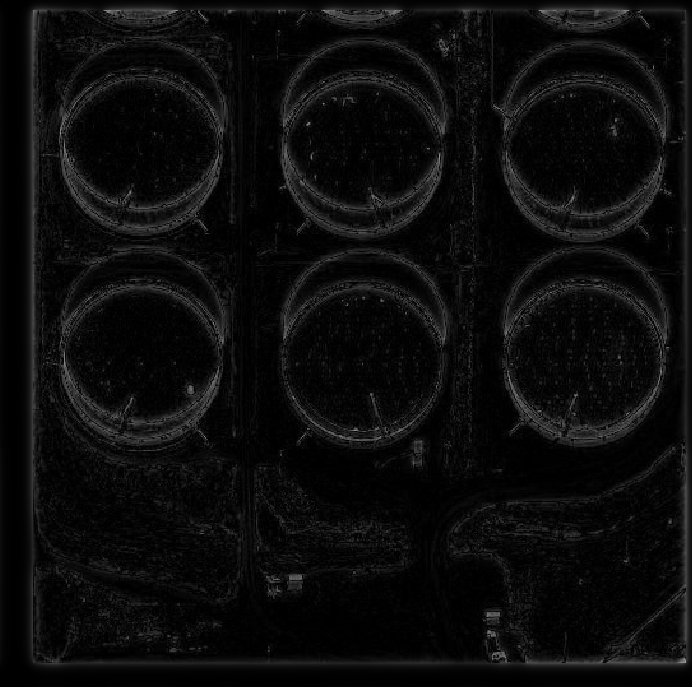

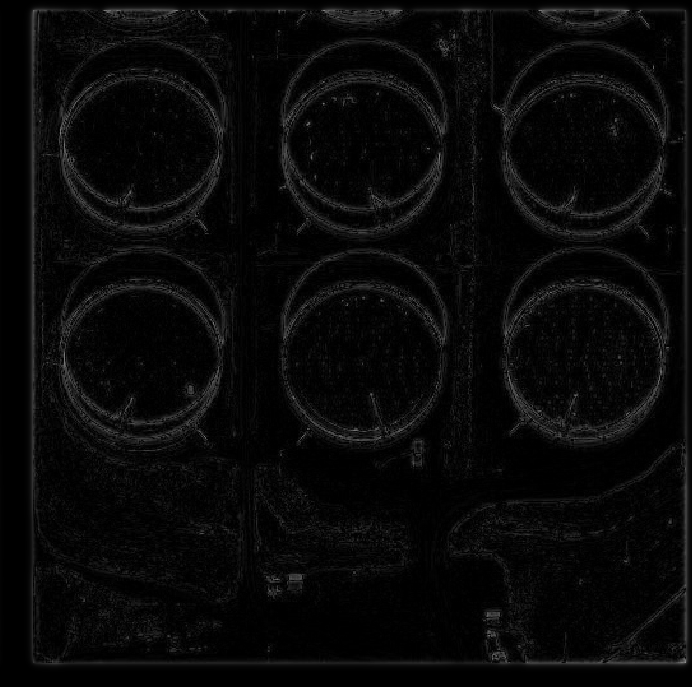

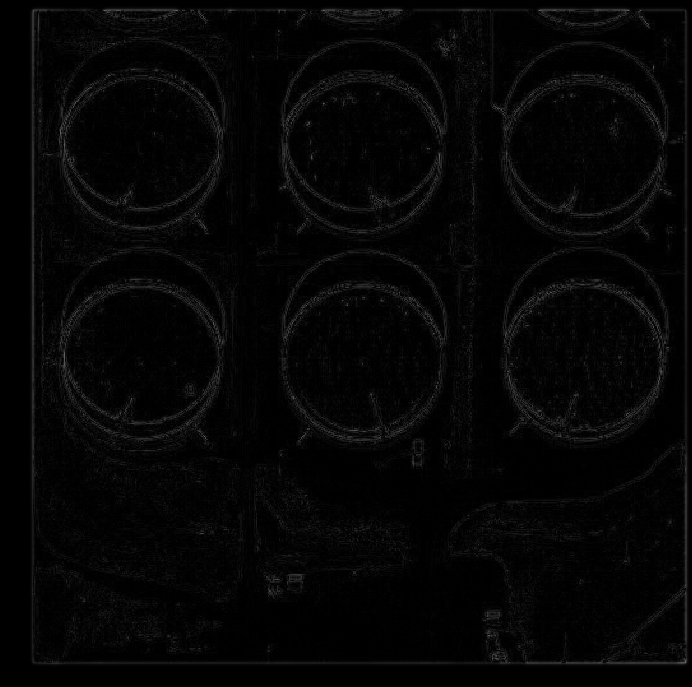

In [24]:
for d0 in [10, 30, 50, 100]:
  H = BLPF(imgg, d0)
  # plt.figure(figsize=(5,5))
  # plt.imshow(H, cmap='gray')
  # plt.axis('off')
  # plt.show()
  Hp = 1 - H
  Gshift = Fshift * Hp
  G = np.fft.ifftshift(Gshift)
  g = np.abs(np.fft.ifft2(G))
  cv2_imshow(g)

In [25]:
def homomorphic_filter(image, filter = 'butterworth', d0=30, n=1):
    img_log = np.log(np.float64(image), dtype=np.float64)
    img_fft = np.fft.fft2(img_log)
    
    img_fft = np.fft.fftshift(img_fft)
    if filter=='butterworth':
        H = 1 - GLPF(image, d0)
    elif filter=='gaussian':
        H = 1 - BLPF(image, d0)
    Gshift = img_fft * (1 -H)
    G = np.fft.ifftshift(Gshift)
    g = np.abs(np.fft.ifft2(G))
    g = np.exp(g, dtype=np.float64)
    g = cv2.normalize(g, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return g


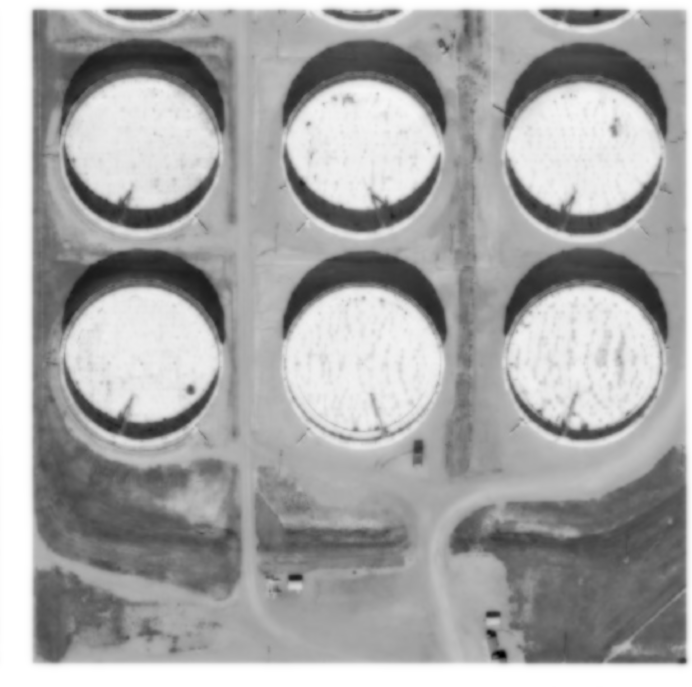

In [27]:
imag = 'tank.png'
img = cv2.imread(imag)
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g = homomorphic_filter(imgg, filter = 'gaussian', d0=60, n=3)
cv2_imshow(g)

In [1]:

from skimage import data
from skimage import filters
from skimage import exposure
from skimage import measure
from skimage import segmentation
from skimage import morphology
from skimage import color

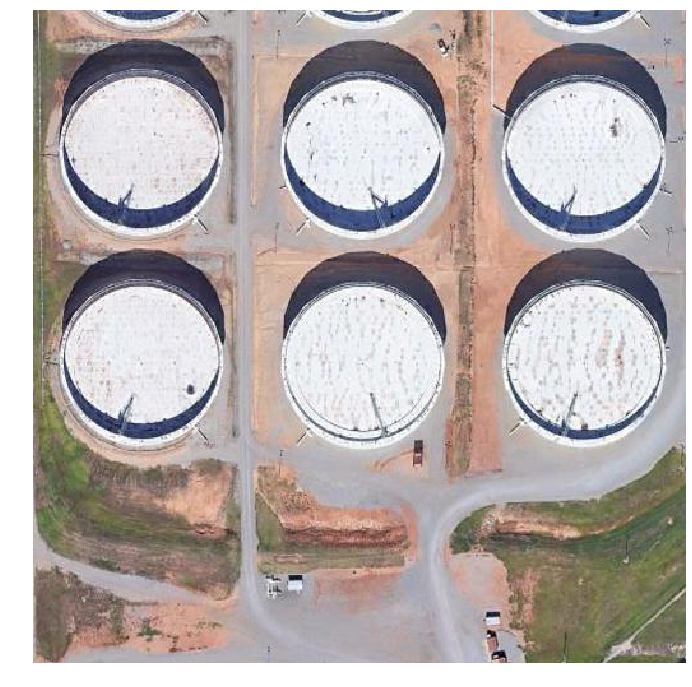

In [5]:
imag = 'tank.png'
img = cv2.imread(imag)
s=img.shape
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [6]:
hsv = color.rgb2hsv(img)
H = hsv[:,:,0]
S = hsv[:,:,1]
V = hsv[:,:,2]

lab = color.rgb2lab(img)
l1 = lab[:,:,0]
l2 = lab[:,:,1]
l3 = lab[:,:,2]

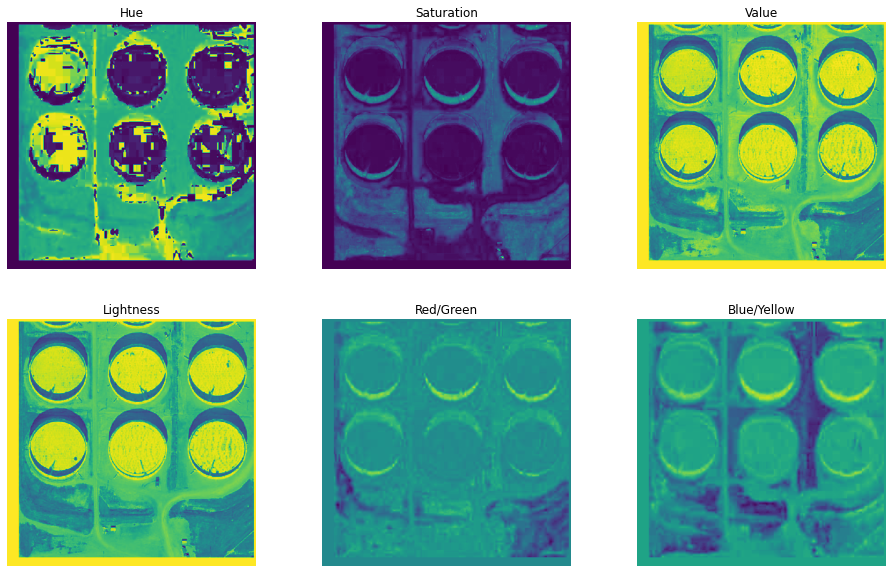

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))

axes[0][0].imshow(H)
axes[0][0].set_title('Hue')

axes[0][1].imshow(S)
axes[0][1].set_title('Saturation')

axes[0][2].imshow(V)
axes[0][2].set_title('Value')

axes[1][0].imshow(l1)
axes[1][0].set_title('Lightness')

axes[1][1].imshow(l2)
axes[1][1].set_title('Red/Green')

axes[1][2].imshow(l3)
axes[1][2].set_title('Blue/Yellow');

for ax in axes.flat:
    ax.axis('off')

In [8]:
c1 = (H+1)/(V+1)
c2 = (S-V)/(S+V)
c3 = -(l1+l3)/(V+1)

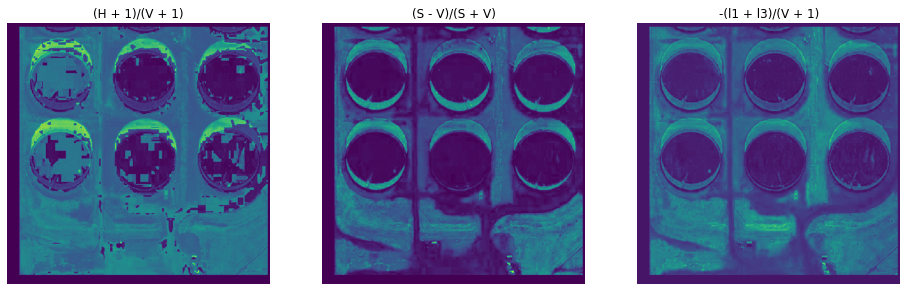

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))
axes[0].imshow(c1)
axes[0].set_title('(H + 1)/(V + 1)')
axes[1].imshow(c2)
axes[1].set_title('(S - V)/(S + V)')
axes[2].imshow(c3)
axes[2].set_title('-(l1 + l3)/(V + 1)');

for ax in axes.flat:
    ax.axis('off')

In [10]:
t1 = filters.threshold_minimum(c3)
t2 = filters.threshold_mean(c3)

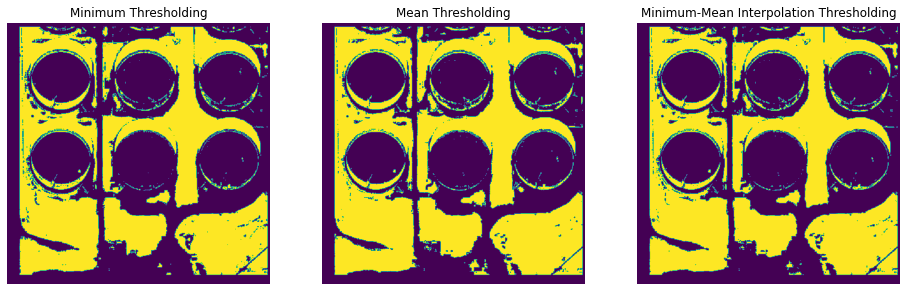

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))
axes[0].imshow(c3 > t1)
axes[0].set_title('Minimum Thresholding')
axes[1].imshow(c3 > t2)
axes[1].set_title('Mean Thresholding')
axes[2].imshow(c3 > (0.6*t1 + 0.4*t2))
axes[2].set_title('Minimum-Mean Interpolation Thresholding')

for ax in axes.flat:
    ax.axis('off')

In [12]:
tank_thresh = c3 > (0.6*t1 + 0.4*t2)

label_1 = filters.hessian(tank_thresh)
label_2 = segmentation.clear_border(filters.hessian(tank_thresh))
label_3 = morphology.closing(segmentation.clear_border(filters.hessian(tank_thresh)))
label_4 = morphology.area_closing(morphology.closing(segmentation.clear_border(filters.hessian(tank_thresh))))
label_image = measure.label(morphology.area_closing(morphology.closing(
            segmentation.clear_border(filters.hessian(tank_thresh)))))

<ipython-input-12-c48c672abd20>:3: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  label_1 = filters.hessian(tank_thresh)
<ipython-input-12-c48c672abd20>:4: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  label_2 = segmentation.clear_border(filters.hessian(tank_thresh))
<ipython-input-12-c48c672abd20>:5: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  label_3 = 

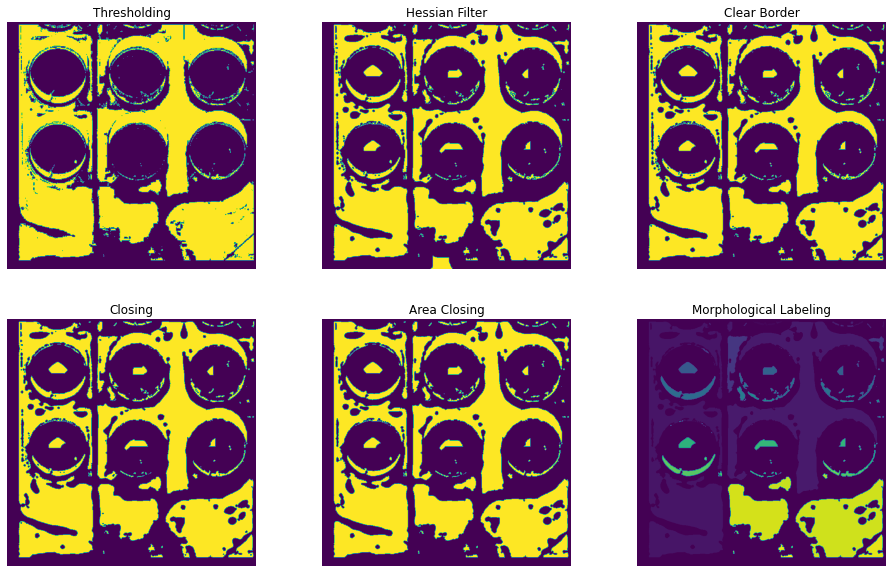

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16,10))

axes[0][0].imshow(tank_thresh)
axes[0][0].set_title('Thresholding')
axes[0][1].imshow(label_1)
axes[0][1].set_title('Hessian Filter')
axes[0][2].imshow(label_2)
axes[0][2].set_title('Clear Border')
axes[1][0].imshow(label_3)
axes[1][0].set_title('Closing')
axes[1][1].imshow(label_4)
axes[1][1].set_title('Area Closing')
axes[1][2].imshow(label_image)
axes[1][2].set_title('Morphological Labeling')

for ax in axes.flat:
    ax.axis('off')